In [148]:
import json
import pandas as pd
import json
import requests

stock = input()

 MSFT


In [150]:
apikey = ""

url = "https://yfapi.net/v6/finance/quote"
url2 = "https://yfapi.net/v11/finance/quoteSummary/"
url3 = "https://yfapi.net/v1/finance/trending/US"

querystring = { "symbols": stock }

headers = { 'x-api-key': apikey }

# api calls
response = requests.request("GET", url, headers=headers, params=querystring)
response2 = requests.request("GET", url2 + stock, headers=headers, params={'modules': 'financialData'})
response3 = requests.request("GET", url3, headers=headers)

if response.status_code == 200 and response3.status_code == 200 and response2.status_code == 200:

    stock_json = response.json()
    target_json = response2.json()
    trending_json = response3.json()

    stock_data = []

    if stock_json['quoteResponse']['result']: # if the stock exists
        
        print("API request for " + str(stock) + " stock data was successful! Please find the data below:")
        
        # basic data
        stock_data.append(str(stock_json['quoteResponse']['result'][0]["symbol"]))
        stock_data.append(str(stock_json['quoteResponse']['result'][0]["longName"]))
        stock_data.append(str(stock_json['quoteResponse']['result'][0]["regularMarketPrice"]))
        stock_data.append(str(target_json['quoteSummary']['result'][0]['financialData']["targetMeanPrice"]['raw']))
        stock_data.append(str(stock_json['quoteResponse']['result'][0]["fiftyTwoWeekHigh"]))
        stock_data.append(str(stock_json['quoteResponse']['result'][0]["fiftyTwoWeekLow"]))
    
        # 5 trending stocks
        trending_stocks = ""
        for i in range(4):
            trending_stocks += trending_json['finance']['result'][0]['quotes'][i]['symbol'] + ", "
        trending_stocks += trending_json['finance']['result'][0]['quotes'][4]['symbol']
        
        stock_data.append(trending_stocks)
    
        print("-" * 10)
    
        print("Ticker Name: " + stock_data[0])
        print("Full Name: " + stock_data[1])
        print("Mean Target Price: " + stock_data[2])
        print("52 Week High: " + stock_data[3])
        print("52 Week Low: " + stock_data[4])
        print("Top 5 Trending Stocks: "+ stock_data[5])


    # stock not found else statement
    else:
        
        print(f"Stock symbol {stock} does not exist or data was not found.")

# response else statement      
else:
    
    print(f"Failed to retrieve data: {response.status_code}")
    

API request for MSFT stock data was successful! Please find the data below:
----------
Ticker Name: MSFT
Full Name: Microsoft Corporation
Mean Target Price: 428.02
52 Week High: 496.38
52 Week Low: 468.35
Top 5 Trending Stocks: 311.21


In [152]:
df = pd.DataFrame([stock_data], columns=['Symbol', 'Long Name', 'Market Price', 'Target Mean Price', '52 Week High', '52 Week Low', 'Top 5 Trending Stocks'])
df.to_csv(f'{stock}_data.csv', index=False)
df

,Symbol,Long Name,Market Price,Target Mean Price,52 Week High,52 Week Low,Top 5 Trending Stocks
0,MSFT,Microsoft Corporation,428.02,496.38,468.35,311.21,"AMSC, PWR, VRT, BBD, SNAP"


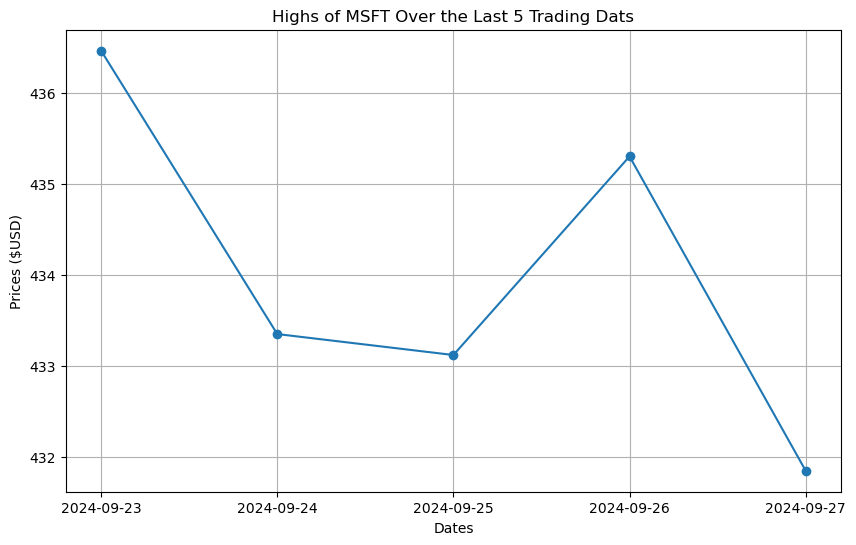

In [154]:
# bonus
import matplotlib.pyplot as plt
from datetime import datetime

url = "https://yfapi.net/v8/finance/chart/" + str(stock)

apikey = ""

querystring = { "range": "5d", "interval": "1d"}
headers = { 'x-api-key': apikey }

response4 = requests.request("GET", url, headers=headers, params=querystring)

if response4.status_code == 200:

    last5_json = response4.json()

    if last5_json['chart']['result']:
        
        prices = last5_json['chart']['result'][0]['indicators']['quote'][0]['high']
        timestamps = last5_json['chart']['result'][0]['timestamp']

        dates = []

        for time in timestamps:

            dates.append(datetime.fromtimestamp(time).strftime('%Y-%m-%d'))

        # graph creation
        plt.figure(figsize=(10, 6))
        plt.plot(dates, prices, marker='o', linestyle='-')
        plt.title(f'Highs of {stock} Over the Last 5 Trading Dats')
        plt.xlabel('Dates')
        plt.ylabel('Prices ($USD)')
        plt.grid(True)
        plt.show()
        
    else:
        
        print(f"Stock symbol {stock} does not exist or data was not found.")
        
else:
    
    print(f"Failed to retrieve data: {response.status_code}")

